

# Appendix B:  Confidence and prediction intervals for bivariate 0D data

This appendix describes how to construct and numerically validate [confidence ellipses](https://en.wikipedia.org/wiki/Confidence_region) (CEs) and [prediction ellipses](https://blogs.sas.com/content/iml/2014/07/23/prediction-ellipses-from-covariance.html) (PEs) for [bivariate](http://mathworld.wolfram.com/Bivariate.html) 0D data. "Bivariate" implies a two-component vector quantity, and "0D" implies a zero-dimensional, stationary process (i.e, a quantity that does not change over some domain like time).


<p style="text-align: center;"><b>Glossary</b></p>

<table align="center">
  <tr>
    <th style="text-align:center">Symbol</th>
    <th style="text-align:center">Description</th>
    <th style="text-align:center">Comment</th>
  </tr>
  <tr>
    <td style="text-align:center">$\alpha$</td>
    <td style="text-align:center">Type I error rate</td> 
    <td style="text-align:center">$\alpha=0.05$ by convention</td>
  </tr>
  <tr>
    <td style="text-align:center">$\boldsymbol{\mu}$</td>
    <td style="text-align:center">Population mean</td> 
    <td style="text-align:center">$\boldsymbol{\mu} = \{\begin{smallmatrix}0 & 0\end{smallmatrix}\}^\textrm{T}$ in all examples below </td>
  </tr>
  <tr>
    <td style="text-align:center">$\boldsymbol{\Omega}$</td>
    <td style="text-align:center">Population covariance matrix</td> 
    <td style="text-align:center">$\boldsymbol{\Omega} = \bigl[ \begin{smallmatrix}1 & 0\\ 0 & 1\end{smallmatrix} \bigr]$ in all examples below</td>
  </tr>
  <tr>
    <td style="text-align:center">$\nu_1$, $\nu_2$</td>
    <td style="text-align:center">Degrees of freedom</td> 
    <td style="text-align:center">For bivariate data: $\nu_1=2$ , $\nu_2 = (J-1)$</td>
  </tr>
  <tr>
    <td style="text-align:center">$c$</td>
    <td style="text-align:center">Critical test statistic value</td> 
    <td style="text-align:center">From Hotelling's $T^2$ distribution</td>
  </tr>
  <tr>
    <td style="text-align:center">$\boldsymbol{m}$</td>
    <td style="text-align:center">Sample mean</td> 
    <td style="text-align:center"></td>
  </tr>
  <tr>
    <td style="text-align:center">$W$</td>
    <td style="text-align:center">Sample covariance matrix</td> 
    <td style="text-align:center"></td>
  </tr>
  <tr>
    <td style="text-align:center">$\lambda$</td>
    <td style="text-align:center">Eigenvalues of the sample covariance matrix</td> 
    <td style="text-align:center"></td>
  </tr>
  <tr>
    <td style="text-align:center">$\omega$</td>
    <td style="text-align:center">Eigenvectors of the sample covariance matrix</td> 
    <td style="text-align:center"></td>
  </tr>
  <tr>
    <td style="text-align:center">$\textit{J}$</td>
    <td style="text-align:center">Sample size</td> 
    <td style="text-align:center"></td>
  </tr>
</table>




___

### Confidence ellipses (CEs)

A 100(1-$\alpha$)% [confidence ellipse](https://en.wikipedia.org/wiki/Confidence_region) contains the true population mean with a probability of (1-$\alpha$). To demonstrate CE computation, let's start with random bivariate Gaussian data:

In [1]:
from math import pi
import numpy as np
from scipy import stats
from matplotlib import pyplot
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection


np.random.seed(2)      #seed the random number generator to replicate results
mu    = [0, 0]         #population mean
Omega = np.eye(2)      #population covariance (identity matrix in this example)
J     = 50             #sample size
r     = np.random.multivariate_normal(mu, Omega, J) #Gaussian data (standard normal distribution)
x,y   = r.T


ax    = pyplot.axes()
ax.plot(x, y, 'o')
ax.axhline(0, color='0.7', lw=0.5)
ax.axvline(0, color='0.7', lw=0.5)
ax.axis('equal')
pyplot.show()

<Figure size 640x480 with 1 Axes>

The CE for this dataset can be constructed as follows:

* Estimate the sample covariance matrix $\boldsymbol{W}$
* Calculate the eigenvalues and eigenvectors of $\boldsymbol{W}$
* Use the eigenvectors as the ellipse's principal axes
* Use the eigenvalues as the ration between the lengths of the ellipse's principal axes
* Scale the axes lengths by the critical Hotelling's $T^2$

This process is illustrated below.

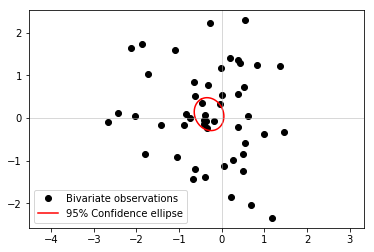

In [2]:
def sample(m, R, a, b, n=51):
    '''
    Sample n points around the periphery of an ellipse
    '''
    u        = np.linspace(0, 2*pi, n)
    x        = a * np.cos(u)
    y        = b * np.sin(u)
    r        = np.vstack( [x,y] ).T 
    ellipse  = m + np.dot( r , R )
    return ellipse

def confidence_ellipse(r, alpha=0.05, n=51):
    m        = r.mean(axis=0)      #sample mean
    W        = np.cov(r.T, bias=1) #sample covariance
    A,lam,R  = np.linalg.svd( W )  #eignproblem solved using singular value decomposition
    J,v1     = r.shape             #sample size and degrees of freedom (numerator)
    v2       = J - 1               #degrees of freedom, denominator
    fcrit    = stats.f.isf(alpha, v1, v2)        #critical F value
    c        = 2 * (J-1) / (J * (J-2)) * fcrit   #critical T2 value
    a,b      = np.sqrt( c * lam )                #axis lengths
    ellipse  = sample(m, R, a, b, n)
    return ellipse


#calculate and sample points from confidence ellipse:
ellipse      = confidence_ellipse(r, alpha=0.05, n=51)
xe,ye        = ellipse.T

#plot:
ax    = pyplot.axes()
ax.plot(x, y, 'ko', label='Bivariate observations')
ax.plot(xe, ye, 'r-', label='95% Confidence ellipse')
ax.axhline(0, color='0.7', lw=0.5)
ax.axvline(0, color='0.7', lw=0.5)
ax.axis('equal')
ax.legend()
pyplot.show()

In this plot it looks as though the CE contains the true population mean of $\boldsymbol{\mu} = \{\begin{smallmatrix}0 & 0\end{smallmatrix}\}^\textrm{T}$, but it's not very clear. One way to determine if the point lies in the ellipse is to compare the directions of two vectors:

* The vector from point *i* on the ellipse to the ellipse centroid
* The vector from point *i* on the ellipse to the population mean

If these two vectors have directions that are more than 90 deg apart, then the true population mean lies outside the ellipse.

In [3]:
def inside_ellipse_approximate(ellipse, point):
    x0,y0  = ellipse.mean(axis=0)  #ellipse centroid
    xp,yp  = point                 
    inside = True
    for x,y in zip(*ellipse.T):
        r0 = x-x0, y-y0
        r1 = x-xp, y-yp
        d  = np.dot(r0, r1)
        if d < 0:
            inside = False
            break
    return inside
        
point  = [0, 0]
inside = inside_ellipse_approximate(ellipse, point)
print('Point %s inside ellipse:  %s' %(point,inside))

Point [0, 0] inside ellipse:  True


A more accurate way to check for ellipse containment is to transform the point from its current, global coordinate system, to the unit circular coordinate system implied by the ellipse (i.e., the sample mean and covariance), and then check if the distance from the sample mean to that point is smaller than one (inside the circle) or greater than one (outside the circle), like this:

In [4]:

def inside_ce(r, point, alpha=0.05):
    m        = r.mean(axis=0)      #sample mean
    W        = np.cov(r.T, bias=1) #sample covariance
    A,lam,R  = np.linalg.svd( W )  #eignproblem solved using singular value decomposition
    J,v1     = r.shape             #sample size and degrees of freedom (numerator)
    v2       = J - 1               #degrees of freedom, denominator
    fcrit    = stats.f.isf(alpha, v1, v2)        #critical F value
    c        = 2 * (J-1) / (J * (J-2)) * fcrit   #critical T2 value
    axis_len = np.sqrt( c * lam )                #axis lengths
    
    rc       = np.array(point) - m   #centered points
    rct      = np.asarray( np.matrix(R) * np.matrix(rc).T).T  #centered and un-rotated points
    rad      = (rct**2 / axis_len**2).sum(axis=1)   #distance from center of centered, un-rotated and un-scaled points
    inside   = float(rad) <= 1    #check if point lies inside or outside the unit sphere  
    return inside

point  = [0, 0]
inside = inside_ce(r, point)
print('Point %s inside confidence ellipse:  %s' %(point,inside))

Point [0, 0] inside confidence ellipse:  True


___

### Prediction ellipses (PEs)

A 100(1-$\alpha$)% [prediction ellipse](https://blogs.sas.com/content/iml/2014/07/23/prediction-ellipses-from-covariance.html) contains a new, bivariate observation from the same population with a probability of (1-$\alpha$).

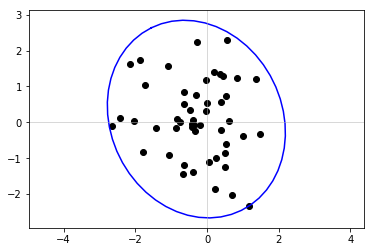

In [5]:
def prediction_ellipse(r, alpha=0.05, n=51):
    m        = r.mean(axis=0)      #sample mean
    W        = np.cov(r.T, bias=1) #sample covariance
    A,lam,R  = np.linalg.svd( W )  #eignproblem solved using singular value decomposition
    J,v1     = r.shape             #sample size and degrees of freedom (numerator)
    v2       = J - 1               #degrees of freedom, denominator
    fcrit    = stats.f.isf(alpha, v1, v2)        #critical F value
    c        = 2 * (J+1) * (J-1) / (J * (J-2)) * fcrit   #PE scale
    a,b      = np.sqrt( c * lam )                #axis lengths
    ellipse  = sample(m, R, a, b, n)
    return ellipse


#calculate and sample points from confidence ellipse:
ellipse_p    = prediction_ellipse(r, alpha=0.05, n=51)
xe,ye        = ellipse_p.T

#plot:
ax    = pyplot.axes()
ax.plot(x, y, 'ko', label='Bivariate observations')
ax.plot(xe, ye, 'b-', label='95% Prediction ellipse')
ax.axhline(0, color='0.7', lw=0.5)
ax.axvline(0, color='0.7', lw=0.5)
ax.axis('equal')
pyplot.show()

We can check if a new, random observation lies in the PE similar as follows:

In [6]:
point  = np.random.multivariate_normal(mu, Omega)
inside = inside_ellipse_approximate(ellipse_p, point)

print('Point %s inside prediction ellipse:  %s' %(point,inside))

Point [1.16152149 0.38607805] inside prediction ellipse:  True


Like above we'll create a more exact function for checking point containment within the ellipse:

In [7]:
def inside_pe(r, point, alpha=0.05):
    m        = r.mean(axis=0)      #sample mean
    W        = np.cov(r.T, bias=1) #sample covariance
    A,lam,R  = np.linalg.svd( W )  #eignproblem solved using singular value decomposition
    J,v1     = r.shape             #sample size and degrees of freedom (numerator)
    v2       = J - 1               #degrees of freedom, denominator
    fcrit    = stats.f.isf(alpha, v1, v2)        #critical F value
    c        = 2 * (J+1) * (J-1) / (J * (J-2)) * fcrit   #PE scale
    axis_len = np.sqrt( c * lam )                #axis lengths
    
    rc       = np.array(point) - m   #centered points
    rct      = np.asarray( np.matrix(R) * np.matrix(rc).T).T  #centered and un-rotated points
    rad      = (rct**2 / axis_len**2).sum(axis=1)   #distance from center of centered, un-rotated and un-scaled points
    inside   = float(rad) <= 1    #check if point lies inside or outside the unit sphere  
    return inside


point  = np.random.multivariate_normal(mu, Omega)
inside = inside_pe(r, point)

print('Point %s inside prediction ellipse:  %s' %(point,inside))

Point [-1.13313327  0.43309255] inside prediction ellipse:  True


___

### Numerically validating confidence and prediction ellipses

Similar to Appendix A, let's numerically validate the `inside_ce` and `inside_pe` functions.

In [8]:
np.random.seed(0)   #seed the random number generator to replicate results
J           = 20    #sample size
niterations = 2000  #number of datasets / experiments to simulate
in_ce       = []    #list that will hold one True or False value for each iteration
mu          = [0,0] #true population mean
Omega       = np.eye(2)  #true population covariance (identity matrix in this example)
alpha       = 0.05  #Type I error rate

for i in range(niterations):
    r       = np.random.multivariate_normal(mu, Omega, J)
    in_ce.append( inside_ce(r, mu, alpha) )
    
prop_in     = np.mean( in_ce )  #proportion of experiments where the true mean lies inside the CE 
prop_out    = 1 - prop_in       #proportion of experiments where the true mean lies outside the CE 

print('Proportion of random datasets with mu inside CE: %.3f' %prop_in)
print('Proportion of random datasets with mu outside CE: %.3f' %prop_out)


Proportion of random datasets with mu inside CE: 0.948
Proportion of random datasets with mu outside CE: 0.052


In [9]:
np.random.seed(100) #seed the random number generator to replicate results
J           = 20    #sample size
niterations = 2000  #number of datasets / experiments to simulate
in_pe       = []    #list that will hold one True or False value for each iteration
mu          = [0,0] #true population mean
Omega       = np.eye(2)  #true population covariance (identity matrix in this example)
alpha       = 0.05  #Type I error rate

for i in range(niterations):
    r       = np.random.multivariate_normal(mu, Omega, J)
    rr      = np.random.multivariate_normal(mu, Omega)    #extra observation
    in_pe.append( inside_pe(r, rr, alpha) )
    
prop_in     = np.mean( in_pe )  #proportion of experiments where the true mean lies inside the PE 
prop_out    = 1 - prop_in       #proportion of experiments where the true mean lies outside the PE 

print('Proportion of random datasets with mu inside PE: %.3f' %prop_in)
print('Proportion of random datasets with mu outside PE: %.3f' %prop_out)

Proportion of random datasets with mu inside PE: 0.952
Proportion of random datasets with mu outside PE: 0.048


Both the CE and PE Type I error rates approach $\alpha$.

___

### Summary

This Appendix demonstrated the difference between CEs and PEs, how to calculate them, how to check whether points lie within the boundaries of the ellipse, and thus how to numerically validate these ellipses using iterative, random dataset simulations. Similar to Appendix A, the key points are:

* A false positive occurs for a CE when the true population bivariate mean lies outside the CE
* A false positive occurs for a PE when a new, random bivariate observation lies outside the PE

and

* 95% CEs contain the true population bivariate mean with a probability of 0.95
* 95% PEs contain a new, random bivariate observation with a probability of 0.95
* 95% CEs and PEs both have false positive rates of $\alpha$=0.05

